# Lab 10

#### Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Week10Q1.csv')
df

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14
5,20.0,8.0,13
6,28.0,7.0,9
7,30.0,6.0,5
8,31.0,9.0,4
9,35.0,12.0,11


In [3]:
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))
def manhattan_distance(point, centroid):
    return np.sum(np.abs(point - centroid))
def minkowski_distance(point, centroid, p=3):
    return np.sum(np.abs(point - centroid) ** p) ** (1/p)

In [4]:
def assign_clusters(data, centroids, distance_metric):
    clusters = []
    for index, row in data.iterrows():
        if distance_metric == 1:
            distances = [euclidean_distance(row.values, centroid) for centroid in centroids]
        elif distance_metric == 2:
            distances = [manhattan_distance(row.values, centroid) for centroid in centroids]
        elif distance_metric == 3:
            distances = [minkowski_distance(row.values, centroid) for centroid in centroids]
        else:
            raise ValueError("Unknown distance metric")
        clusters.append(np.argmin(distances))
    return np.array(clusters)

In [5]:
def kmeans(data, k, distance_metric, max_iterations=10):
    centroids = data.sample(n=k).values
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids, distance_metric)
        centroids = np.array([data[clusters == i].mean().values for i in range(k)])
    return clusters, centroids

In [6]:
print("Welcome to K-Means Clustering!")
print("Choose a distance metric:")
print("1. Euclidean")
print("2. Manhattan")
print("3. Minkowski")
choice = int(input("Enter your choice (1, 2, or 3): "))
if choice == 1:
    print("Continuing with Euclidean Distance.")
elif choice == 2:
    print("Continuing with Manhattan Distance.")
elif choice == 3:
    print("Continuing with Minkowski Distance.")
else:
    print("Invalid Choice.")

Welcome to K-Means Clustering!
Choose a distance metric:
1. Euclidean
2. Manhattan
3. Minkowski
Continuing with Manhattan Distance.


In [7]:
def compute_sse(data, clusters, centroids):
    sse = 0
    for i in range(len(centroids)):
        sse += np.sum((data[clusters == i] - centroids[i]) ** 2)
    return sse

In [8]:
sse_values = []

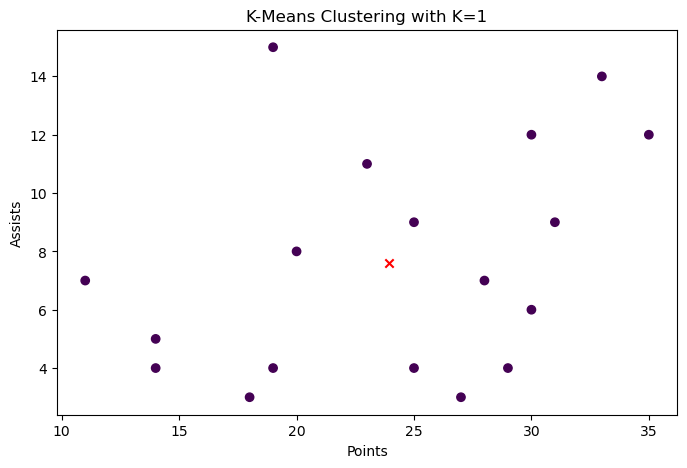

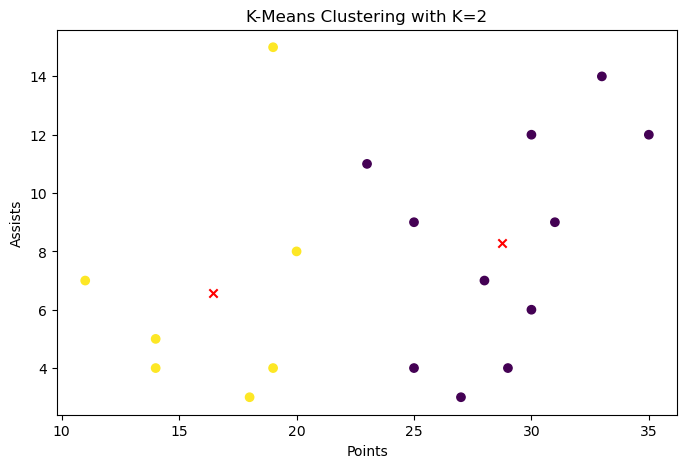

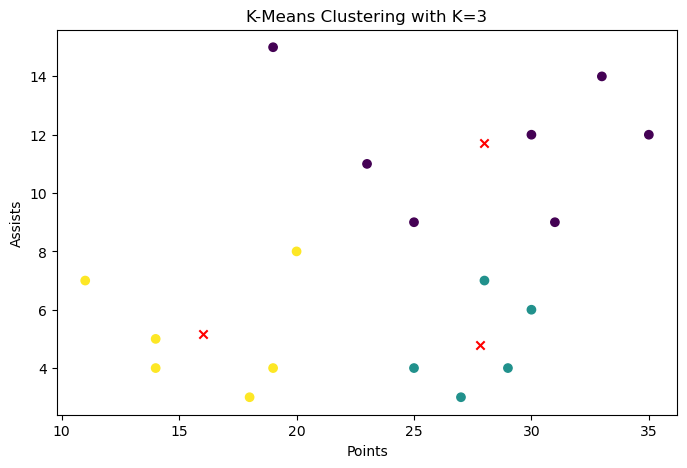

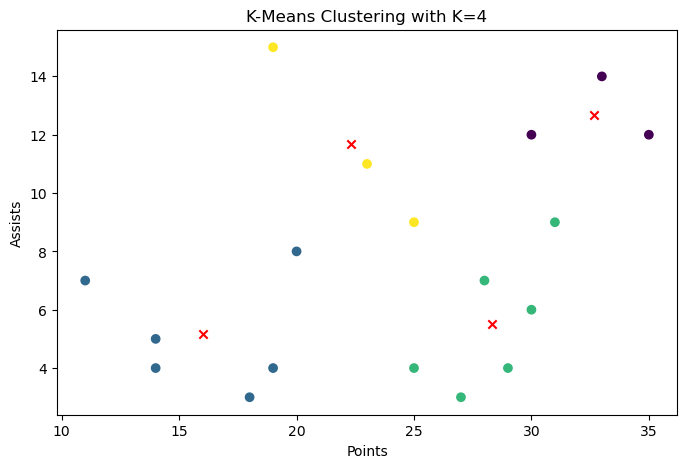

In [9]:
sse_values = []
for k in range(1, 5):
    clusters, centroids = kmeans(df, k, choice)
    plt.figure(figsize=(8, 5))
    plt.scatter(df['points'], df['assists'], c=clusters, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title(f'K-Means Clustering with K={k}')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.show()
    sse = compute_sse(df.values, clusters, centroids)
    sse_values.append(sse)

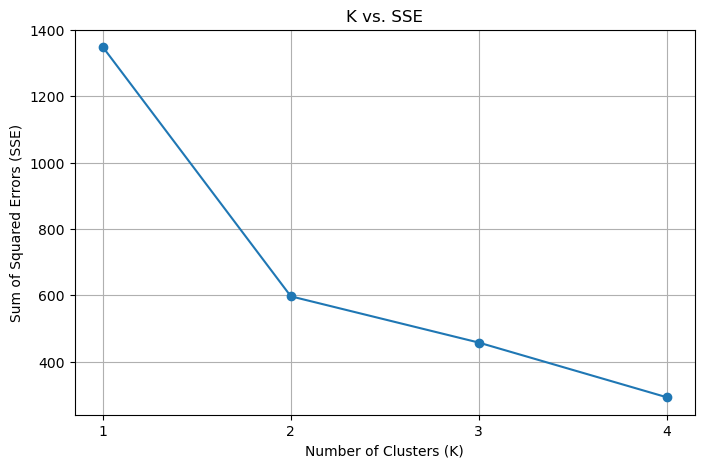

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), sse_values, marker='o')
plt.title('K vs. SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 5))
plt.grid()
plt.show()